## **PACKAGES**

In [2]:
pip install torch
pip install torchvision
pip install pillow
pip install opencv-python

^C
ERROR: Operation cancelled by user
Note: you may need to restart the kernel to use updated packages.


In [188]:
import os
import random
from os import path
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import torch
import torch.nn as nn
import torchvision
from torchvision import models
from torch.utils.data import Dataset
import torchvision.transforms as transforms
import torch.optim as optim
from torch.utils.data import DataLoader
import cv2
import PIL
from PIL import Image
from sklearn.model_selection import train_test_split
# import torch
# import torch.nn as nn
import torch.nn.functional as F
# can use the below import should you choose to initialize the weights of your Net
import torch.nn.init as I

os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

## **GET DATA**

**Get the data from dataset**

In [9]:
# file_name = "../Dataset/Data/" # nom de mon fichier dans lequel se trouve mes données localement
file_name = "../input/wildlife-animals-images" #sur kaggle for gpu

In [10]:
glob.glob(file_name+"/*/*")

['../input/wildlife-animals-images/wolf-resize-300/wolf-resize-300',
 '../input/wildlife-animals-images/fox-resize-224/fox-resize-224',
 '../input/wildlife-animals-images/hyena-resize-300/resize-300',
 '../input/wildlife-animals-images/hyena-resize-512/resize-512',
 '../input/wildlife-animals-images/lion-resize-224/lion-resize-224',
 '../input/wildlife-animals-images/lion-resize-512/lion-resize-512',
 '../input/wildlife-animals-images/hyena-resize-224/resize-224',
 '../input/wildlife-animals-images/lion-resize-300/lion-resize-300',
 '../input/wildlife-animals-images/wolf-resize-224/wolf-resize-224',
 '../input/wildlife-animals-images/tiger-resize-512/tiger-resize-512',
 '../input/wildlife-animals-images/tiger-resize-300/tiger-resize-300',
 '../input/wildlife-animals-images/tiger-resize-224/tiger-resize-224',
 '../input/wildlife-animals-images/cheetah-resize-512/resize-512',
 '../input/wildlife-animals-images/fox-resize-512/fox-resize-512',
 '../input/wildlife-animals-images/wolf-resize

In [11]:
list_files = glob.glob(file_name+"/*") # chargement de la liste des fichiers
categories = ['cheetah','fox','hyena','lion','tiger','wolf']
resolution = [224,224] # la resolution avec laquelle on va travailler
print(list_files)

In [77]:
#for kaggle
cheetah_files =  glob.glob(list_files[15]+"/*/*")
fox_files =  glob.glob(list_files[1]+"/*/*")
hyena_files =  glob.glob(list_files[6]+"/*/*")
lion_files = glob.glob(list_files[4]+"/*/*") # lecture des image du fichier de l'animal
tiger_files =  glob.glob(list_files[11]+"/*/*")
wolf_files =  glob.glob(list_files[8]+"/*/*")

In [14]:
#for locals
# cheetah_files =  glob.glob(list_files[0]+"/*/*")
# fox_files =  glob.glob(list_files[3]+"/*/*")
# hyena_files =  glob.glob(list_files[6]+"/*/*")
# lion_files = glob.glob(list_files[9]+"/*/*") # lecture des image du fichier de l'animal
# tiger_files =  glob.glob(list_files[12]+"/*/*")
# wolf_files =  glob.glob(list_files[15]+"/*/*")

In [78]:
folders = [cheetah_files,fox_files, hyena_files, lion_files, tiger_files, wolf_files]

In [81]:
files = []
for folder in folders:
    for i in range(len(folder)):
        file_size = os.path.getsize(folder[i])
        if file_size == 0:
            print(folder[i])
            continue
        files.append(folder[i])
display(len(files))

../input/wildlife-animals-images/cheetah-resize-224/resize-224/00000244_224resized.png
../input/wildlife-animals-images/hyena-resize-224/resize-224/00000224_224resized.png


1723

## **DATA VISUALIZATION**

In [82]:
def VisualizeData(file, num_images, label):
    num = 60
    print(f"there are {len(file)} images in the folder {label}")
    plt.figure(figsize=(20,10),facecolor="silver") 
#     print('before for')
    for num_1 in range(num,num+num_images):
#         print(f'before suplot num1 is {num_1}')
        plt.subplot(3,3,num_1-num+1)
#         print(file[num_1])
        image = cv2.imread(file[num_1]) # lecture d'une seule image
        plt.imshow(image, aspect = 'equal')

there are 343 images in the folder cheetah
there are 250 images in the folder fox
there are 306 images in the folder hyena
there are 294 images in the folder lion
there are 269 images in the folder tiger
there are 263 images in the folder wolf


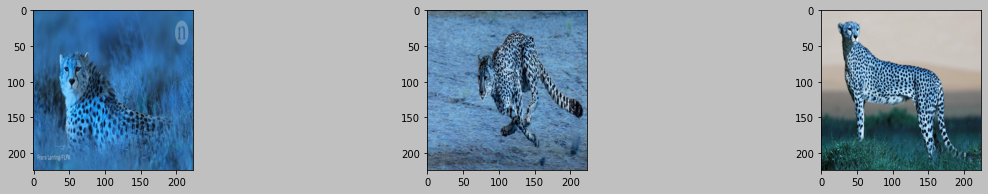

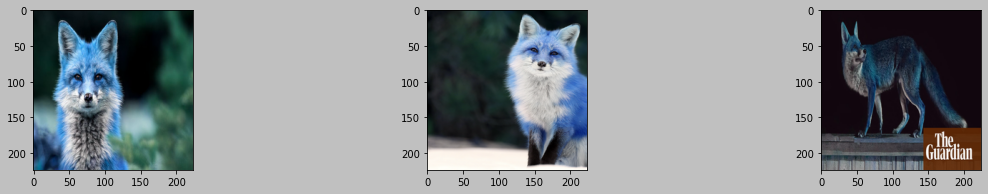

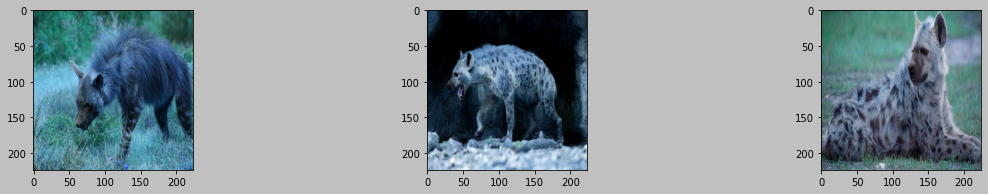

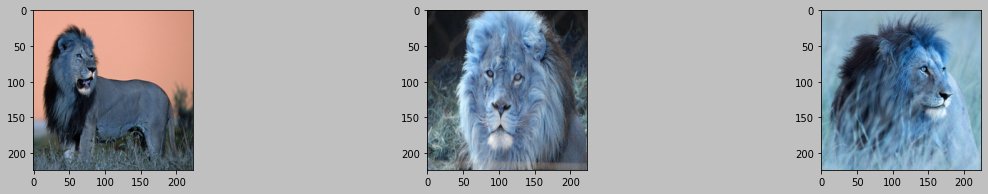

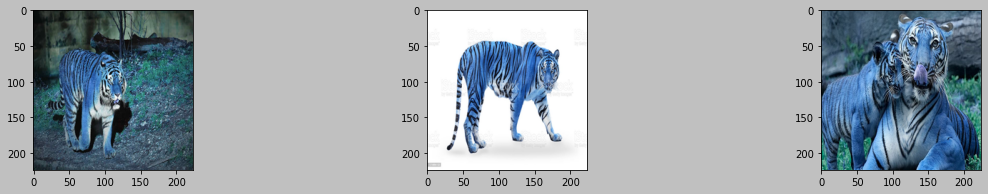

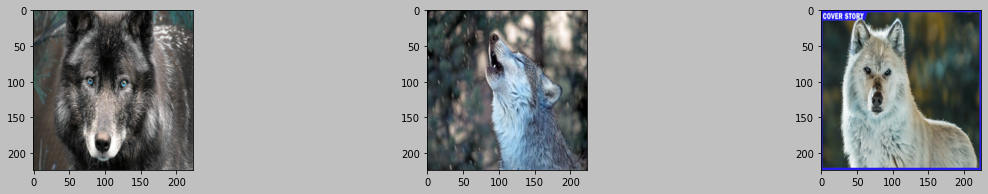

In [85]:
#for kaggle
count = 0
for folder in folders:
    label = folder[1].split('/')[3].split('-')[0]
    VisualizeData(folder, 3, label)

In [19]:
#for local

# count = 0
# for folder in folders:
#     label = folder[1].split('-')[0].split('\\')[1]
#     VisualizeData(folder, 3, label)

## **DATAFRAME BUILDING**

In [20]:
#for local

# data_lst = []
# for folder in folders:
#     for file in folder:
#          data_lst.append(
#         {
#             'path': file,
#             'label': file.split('-')[0].split('\\')[1],
#         }
#     )
# data_df = pd.DataFrame(data_lst)

In [86]:
#for kaggle
data_lst = []
for file in files:
     data_lst.append(
    {
        'path': file,
        'label': file.split('/')[3].split('-')[0],
    }
    )
data_df = pd.DataFrame(data_lst)

In [87]:
print(len(data_lst))
print(len(data_df))
data_df.head()

1723
1723


,path,label
0,../input/wildlife-animals-images/cheetah-resiz...,cheetah
1,../input/wildlife-animals-images/cheetah-resiz...,cheetah
2,../input/wildlife-animals-images/cheetah-resiz...,cheetah
3,../input/wildlife-animals-images/cheetah-resiz...,cheetah
4,../input/wildlife-animals-images/cheetah-resiz...,cheetah


In [88]:
#encode labels to numeric labels
data_df['label_int'] = pd.Categorical(data_df['label']).codes
display(data_df)

,path,label,label_int
0,../input/wildlife-animals-images/cheetah-resiz...,cheetah,0
1,../input/wildlife-animals-images/cheetah-resiz...,cheetah,0
2,../input/wildlife-animals-images/cheetah-resiz...,cheetah,0
3,../input/wildlife-animals-images/cheetah-resiz...,cheetah,0
4,../input/wildlife-animals-images/cheetah-resiz...,cheetah,0
...,...,...,...
1718,../input/wildlife-animals-images/wolf-resize-2...,wolf,5
1719,../input/wildlife-animals-images/wolf-resize-2...,wolf,5
1720,../input/wildlife-animals-images/wolf-resize-2...,wolf,5
1721,../input/wildlife-animals-images/wolf-resize-2...,wolf,5


In [89]:
#save dataframe
data_df.to_csv('wild_animals.csv')

## **TRAINING/TEST Split**

In [90]:
df = pd.read_csv('wild_animals.csv')
path = df.iloc[30,1]
display(df)
print(path)
df_data = df[['path', 'label_int']]
display(df_data.head())

,Unnamed: 0,path,label,label_int
0,0,../input/wildlife-animals-images/cheetah-resiz...,cheetah,0
1,1,../input/wildlife-animals-images/cheetah-resiz...,cheetah,0
2,2,../input/wildlife-animals-images/cheetah-resiz...,cheetah,0
3,3,../input/wildlife-animals-images/cheetah-resiz...,cheetah,0
4,4,../input/wildlife-animals-images/cheetah-resiz...,cheetah,0
...,...,...,...,...
1718,1718,../input/wildlife-animals-images/wolf-resize-2...,wolf,5
1719,1719,../input/wildlife-animals-images/wolf-resize-2...,wolf,5
1720,1720,../input/wildlife-animals-images/wolf-resize-2...,wolf,5
1721,1721,../input/wildlife-animals-images/wolf-resize-2...,wolf,5


../input/wildlife-animals-images/cheetah-resize-224/resize-224/00000034_224resized.png


,path,label_int
0,../input/wildlife-animals-images/cheetah-resiz...,0
1,../input/wildlife-animals-images/cheetah-resiz...,0
2,../input/wildlife-animals-images/cheetah-resiz...,0
3,../input/wildlife-animals-images/cheetah-resiz...,0
4,../input/wildlife-animals-images/cheetah-resiz...,0


(224, 224, 3)


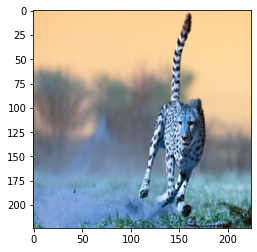

In [91]:
#sample image from dataet
image = cv2.imread(str(path))
print(image.shape)
plt.imshow(image)

In [142]:
def set_seed(seed: int = 42) -> None:
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    # When running on the CuDNN backend, two further options must be set
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    # Set a fixed value for the hash seed
    os.environ["PYTHONHASHSEED"] = str(seed)
    print(f"Random seed set as {seed}")

set_seed()

Random seed set as 42


In [148]:
valid_size = 0.15
test_size = 0.15
train, test = train_test_split(df_data, test_size=test_size, random_state=42, shuffle=True)
train, valid = train_test_split(train, test_size=valid_size, random_state=42, shuffle=True)
train = train.reset_index(drop =True)
valid = valid.reset_index(drop =True)
test = test.reset_index(drop =True)
display(train.head())
display(test.head())
display(valid.head())

,path,label_int
0,../input/wildlife-animals-images/cheetah-resiz...,0
1,../input/wildlife-animals-images/tiger-resize-...,4
2,../input/wildlife-animals-images/tiger-resize-...,4
3,../input/wildlife-animals-images/fox-resize-22...,1
4,../input/wildlife-animals-images/fox-resize-22...,1


,path,label_int
0,../input/wildlife-animals-images/cheetah-resiz...,0
1,../input/wildlife-animals-images/lion-resize-2...,3
2,../input/wildlife-animals-images/fox-resize-22...,1
3,../input/wildlife-animals-images/tiger-resize-...,4
4,../input/wildlife-animals-images/fox-resize-22...,1


,path,label_int
0,../input/wildlife-animals-images/fox-resize-22...,1
1,../input/wildlife-animals-images/wolf-resize-2...,5
2,../input/wildlife-animals-images/wolf-resize-2...,5
3,../input/wildlife-animals-images/fox-resize-22...,1
4,../input/wildlife-animals-images/fox-resize-22...,1


In [93]:
#save split dataset to excel files
train.to_csv('wild_animals_train.csv')
valid.to_csv('wild_animals_valid.csv')
test.to_csv('wild_animals_test.csv')

## **DATASET**

In [221]:
class WildAnimalsDataset(Dataset):
    def __init__(self, csv_file, transform=None):
        self.annotations = pd.read_csv(csv_file)
        self.transform = transform
        
    def __len__(self):
        return len(self.annotations) #1725
    
    def __getitem__(self,index):
        img_path = self.annotations.iloc[index,1]
#         print(img_path)
        image = Image.open(str(img_path)).convert('RGB')
#         image_pil = Image.fromarray((image * 255).astype(np.uint8))
        y_label = torch.tensor(int(self.annotations.iloc[index,2]))
        
        if self.transform:
            image = self.transform(image)
#             image = image.permute(1,2,0)
#             print(image.shape)
            
        return (image, y_label)
    
    

In [31]:
# # tranforms

# class Normalize(object):
#     """Convert a color image to grayscale and normalize the color range to [0,1]."""        

#     def __call__(self, image):
#         image_copy = np.copy(image)
#         # convert image to grayscale
# #         image_copy = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
#         # scale color range from [0, 255] to [0, 1]
#         image_copy=  image_copy/255.0
#         return image_copy


# class Rescale(object):
#     """Rescale the image in a sample to a given size.
#     Args:
#         output_size (tuple or int): Desired output size. If tuple, output is
#             matched to output_size. If int, smaller of image edges is matched
#             to output_size keeping aspect ratio the same.
#     """

#     def __init__(self, output_size):
#         assert isinstance(output_size, (int, tuple))
#         self.output_size = output_size

#     def __call__(self, image):


#         h, w = image.shape[:2]
#         if isinstance(self.output_size, int):
#             if h > w:
#                 new_h, new_w = self.output_size * h / w, self.output_size
#             else:
#                 new_h, new_w = self.output_size, self.output_size * w / h
#         else:
#             new_h, new_w = self.output_size

#         new_h, new_w = int(new_h), int(new_w)

#         img = cv2.resize(image, (new_w, new_h))

#         return img


# # class RandomCrop(object):
# #     """Crop randomly the image in a sample.
# #     Args:
# #         output_size (tuple or int): Desired output size. If int, square crop
# #             is made.
# #     """

# #     def __init__(self, output_size):
# #         if isinstance(output_size, int):
# #             self.output_size = (output_size, output_size)
# #         else:
# #             assert len(output_size) == 2
# #             self.output_size = output_size

# #     def __call__(self, image):

# #         h, w = image.shape[:2]
# #         new_h, new_w = self.output_size

# #         top = np.random.randint(0, h - new_h)
# #         left = np.random.randint(0, w - new_w)

# #         image = image[top: top + new_h,
# #                       left: left + new_w]

# #         return image


# # class ToTensor(object):
# #     """Convert ndarrays in sample to Tensors."""

# #     def __call__(self, image):
         
# # #         # if image has no grayscale color channel, add one
# # #         if(len(image.shape) == 2):
# # #             # add that third color dim
# # #             image = image.reshape(image.shape[0], image.shape[1], 1)
            
# #         # swap color axis because
# #         # numpy image: H x W x C
# #         # torch image: C X H X W
# #         image = image.transpose((0, 1, 2))
        
# #         return torch.from_numpy(image)

## **TRAINING FUNCTIONS**

In [250]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


def train_model(model, train_loader, valid_loader, optimizer,criterion, num_epochs):
#     %%time
    # keeping-track-of-losses 
    train_losses = []
    valid_losses = []

    for epoch in range(1, num_epochs + 1):

        # keep-track-of-training-and-validation-loss
        train_loss = 0.0
        valid_loss = 0.0

        # training-the-model
        model.train()
        for data, target in train_loader:
            # move-tensors-to-GPU 
            data = data.to(device)
            target = target.to(device)
            # clear-the-gradients-of-all-optimized-variables
            optimizer.zero_grad()
            # forward-pass: compute-predicted-outputs-by-passing-inputs-to-the-model
            output = model(data)
            # calculate-the-batch-loss
            loss = criterion(output, target)
            # backward-pass: compute-gradient-of-the-loss-wrt-model-parameters
            loss.backward()
            # perform-a-ingle-optimization-step (parameter-update)
            optimizer.step()
            # update-training-loss
            train_loss += loss.item() * data.size(0)

        # validate-the-model
        model.eval()
        for data, target in valid_loader:
            data = data.to(device)
            target = target.to(device)
            output = model(data)
            loss = criterion(output, target)
            # update-average-validation-loss 
            valid_loss += loss.item() * data.size(0)

        # calculate-average-losses
        train_loss = train_loss/len(train_loader.sampler)
        valid_loss = valid_loss/len(valid_loader.sampler)
        train_losses.append(train_loss)
        valid_losses.append(valid_loss)

        # print-training/validation-statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, train_loss, valid_loss))
    plt.plot(train_losses, label='Training loss')
    plt.plot(valid_losses, label='Validation loss')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend(frameon=False)
    return model

def evaluate_model(model, test_loader):
    # test-the-model
    model.eval()  # it-disables-dropout
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()    

        print('Test Accuracy of the model: {} %'.format(100 * correct / total))
    return model


## **Experiment 1: CNN**

**DATA AUGMENTATION**

In [230]:
# Data Augmentation
data_transform_train = transforms.Compose([
#                                      Rescale(250),
#                                      Normalize(),
#                                      lambda x: PIL.Image.fromarray(),
#                                      torchvision.transforms.ToPILImage('uint8'),
                                     torchvision.transforms.Grayscale(),

                                     torchvision.transforms.RandomCrop(224),
                                     torchvision.transforms.RandomVerticalFlip(),
                                     torchvision.transforms.RandomHorizontalFlip(),
                                     torchvision.transforms.ToTensor(),
                                     torchvision.transforms.Normalize(0.485, 0.229)
                                   
])
data_transform_test = transforms.Compose([
#                                      Rescale(250),
#                                      Normalize(),
#                                      lambda x: PIL.Image.fromarray(x),
#                                         torchvision.transforms.ToTensor(),
#                                         torchvision.transforms.Grayscale(),
#                                         torchvision.transforms.ToPILImage(),
                                        torchvision.transforms.Grayscale(),

                                        torchvision.transforms.RandomCrop(224),
                                        torchvision.transforms.ToTensor(),
                                        torchvision.transforms.Normalize(0.485, 0.229)
#                                      torchvision.transforms.ToTensor()
])
train_dataset = WildAnimalsDataset(csv_file ='wild_animals_train.csv', transform = data_transform_train)
valid_dataset = WildAnimalsDataset(csv_file ='wild_animals_valid.csv', transform = data_transform_test)
test_dataset = WildAnimalsDataset(csv_file ='wild_animals_test.csv', transform = data_transform_test)

print(f'the train dataset length is {len(train_dataset)}')
print(f'the validation dataset length is {len(valid_dataset)}')
print(f'the test dataset length is {len(test_dataset)}')

the train dataset length is 1244
the validation dataset length is 220
the test dataset length is 259


torch.Size([1, 224, 224])
tensor(3)


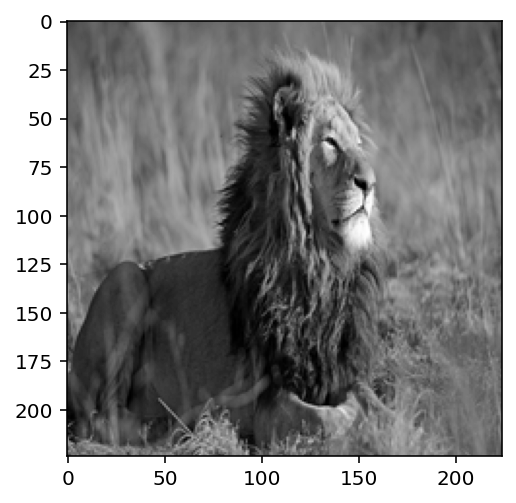

In [231]:
#show an image sample
image,label = test_dataset[1]
plt.imshow(image.permute(1,2,0),cmap='gray')
print(image.shape)
print(label)

**BATCHING AND LOADING DATA**

In [232]:
batch_size = 32

train_loader = DataLoader(train_dataset, 
                          batch_size=batch_size,
                          shuffle=True, 
                          num_workers=0)

valid_loader = DataLoader(valid_dataset, 
                          batch_size=batch_size,
                          shuffle=True, 
                          num_workers=0)

test_loader = DataLoader(test_dataset, 
                          batch_size=batch_size,
                          shuffle=True, 
                          num_workers=0)

**MODEL ARCHITECTURE**

In [233]:
#building CNN
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 64, 5) # 220 - 110 after pool
        self.conv2 = nn.Conv2d(64, 128, 5) # 106 - 53 after pool
        self.conv3 = nn.Conv2d(128,256,3) # 51 - 25 after pool
        self.conv4 = nn.Conv2d(256,512,3) # 23 - 11 after pool
        self.pool = nn.MaxPool2d(2,2)
        self.fc1 = nn.Linear(512*11*11,200)
        self.drop = nn.Dropout(0.4)
        self.fc2 = nn.Linear(200,100)
        self.fc3 = nn.Linear(100,6) 
        
        ## Note that among the layers to add, consider including:
        # maxpooling layers, multiple conv layers, fully-connected layers, and other layers (such as dropout or batch normalization) to avoid overfitting
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.drop(x)
        x = self.fc2(x)
        x = self.drop(x)
        x = self.fc3(x)
        # a modified x, having gone through all the layers of your model, should be returned
        return x

**HYPERPARAMETERS**

In [234]:
#hyperparameters
num_epochs = 16
num_classes = 6
learning_rate = 0.001

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

**TRAINING & TESTING**

Net(
  (conv1): Conv2d(1, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=61952, out_features=200, bias=True)
  (drop): Dropout(p=0.4, inplace=False)
  (fc2): Linear(in_features=200, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=6, bias=True)
)
Epoch: 1 	Training Loss: 1.960336 	Validation Loss: 1.630024
Epoch: 2 	Training Loss: 1.518932 	Validation Loss: 1.475977
Epoch: 3 	Training Loss: 1.461886 	Validation Loss: 1.454269
Epoch: 4 	Training Loss: 1.456771 	Validation Loss: 1.344950
Epoch: 5 	Training Loss: 1.381494 	Validation Loss: 1.344139
Epoch: 6 	Training Loss: 1.356564 	Validation Loss: 1.434101
Epoch: 7 	Training Loss: 1.365764 	Validation Loss: 1.461344
Epoch: 

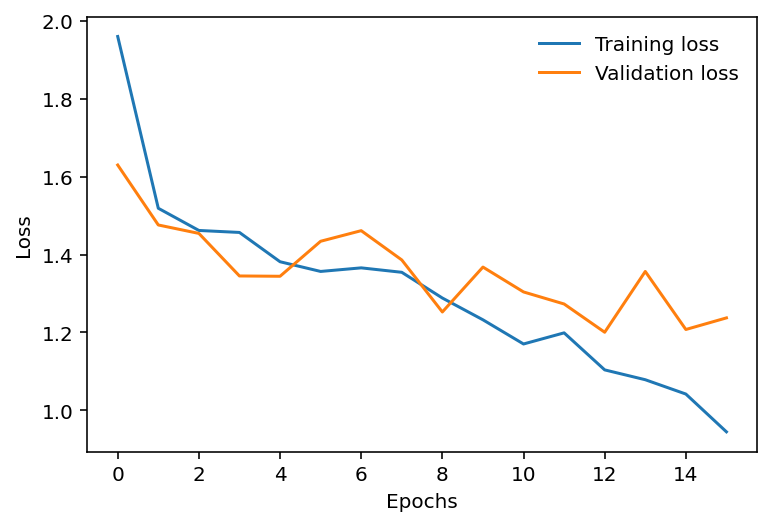

In [251]:
model = Net()
print(model)
model = Net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = learning_rate)
model = train_model(model, train_loader, valid_loader, optimizer,criterion, num_epochs)
model = evaluate_model(model, test_loader)

# Save 
torch.save(model.state_dict(), 'model1.ckpt')

## **Experiment 2: Pretrained Model RESNET50**

In [252]:
#hyperparameters
num_epochs = 16
num_classes = 6
learning_rate = 0.001

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [199]:
#  dir(models)

In [253]:
data_transform_train = transforms.Compose([
#                                      Rescale(250),
#                                      Normalize(),
#                                      lambda x: PIL.Image.fromarray(),
#                                      torchvision.transforms.ToPILImage('uint8'),
#                                      torchvision.transforms.Grayscale(),

                                     torchvision.transforms.RandomCrop(224),
                                     torchvision.transforms.RandomVerticalFlip(),
                                     torchvision.transforms.RandomHorizontalFlip(),
                                     torchvision.transforms.ToTensor(),
                                     torchvision.transforms.Normalize((0.485,0.485,0.485), (0.229,0.229,0.229))
                                   
])
data_transform_test = transforms.Compose([
#                                      Rescale(250),
#                                      Normalize(),
#                                      lambda x: PIL.Image.fromarray(x),
#                                         torchvision.transforms.ToTensor(),
#                                         torchvision.transforms.Grayscale(),
#                                         torchvision.transforms.ToPILImage(),
#                                         torchvision.transforms.Grayscale(),

                                        torchvision.transforms.RandomCrop(224),
                                        torchvision.transforms.ToTensor(),
                                        torchvision.transforms.Normalize((0.485,0.485,0.485), (0.229,0.229,0.229))
#                                      torchvision.transforms.ToTensor()
])
train_dataset = WildAnimalsDataset(csv_file ='wild_animals_train.csv', transform = data_transform_train)
valid_dataset = WildAnimalsDataset(csv_file ='wild_animals_valid.csv', transform = data_transform_test)
test_dataset = WildAnimalsDataset(csv_file ='wild_animals_test.csv', transform = data_transform_test)

print(f'the train dataset length is {len(train_dataset)}')
print(f'the validation dataset length is {len(valid_dataset)}')
print(f'the test dataset length is {len(test_dataset)}')

the train dataset length is 1244
the validation dataset length is 220
the test dataset length is 259


In [254]:
batch_size = 32

train_loader = DataLoader(train_dataset, 
                          batch_size=batch_size,
                          shuffle=True, 
                          num_workers=0)

valid_loader = DataLoader(valid_dataset, 
                          batch_size=batch_size,
                          shuffle=True, 
                          num_workers=0)

test_loader = DataLoader(test_dataset, 
                          batch_size=batch_size,
                          shuffle=True, 
                          num_workers=0)

torch.Size([3, 224, 224])
tensor(1)


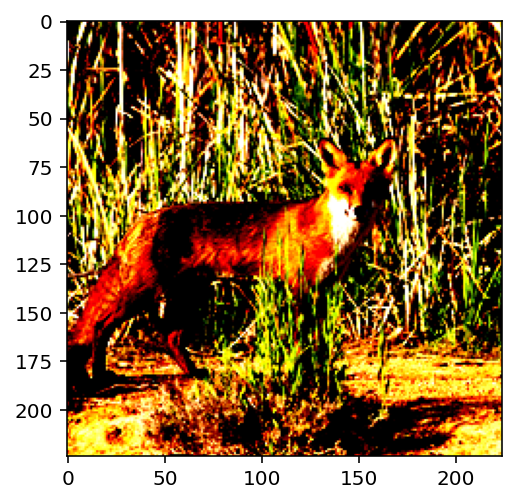

In [255]:
#show an image sample
image,label = test_dataset[6]
plt.imshow(image.permute(1,2,0))
print(image.shape)
print(label)

Epoch: 1 	Training Loss: 0.886020 	Validation Loss: 0.221533
Epoch: 2 	Training Loss: 0.306057 	Validation Loss: 0.123867
Epoch: 3 	Training Loss: 0.258166 	Validation Loss: 0.109407
Epoch: 4 	Training Loss: 0.184608 	Validation Loss: 0.099393
Epoch: 5 	Training Loss: 0.170390 	Validation Loss: 0.097966
Epoch: 6 	Training Loss: 0.170040 	Validation Loss: 0.094802
Epoch: 7 	Training Loss: 0.112358 	Validation Loss: 0.075103
Epoch: 8 	Training Loss: 0.119124 	Validation Loss: 0.081697
Epoch: 9 	Training Loss: 0.112710 	Validation Loss: 0.080849
Epoch: 10 	Training Loss: 0.109861 	Validation Loss: 0.073630
Epoch: 11 	Training Loss: 0.097657 	Validation Loss: 0.074311
Epoch: 12 	Training Loss: 0.086148 	Validation Loss: 0.074615
Epoch: 13 	Training Loss: 0.105801 	Validation Loss: 0.088730
Epoch: 14 	Training Loss: 0.093066 	Validation Loss: 0.072598
Epoch: 15 	Training Loss: 0.076163 	Validation Loss: 0.073638
Epoch: 16 	Training Loss: 0.082481 	Validation Loss: 0.072643
Test Accuracy of 

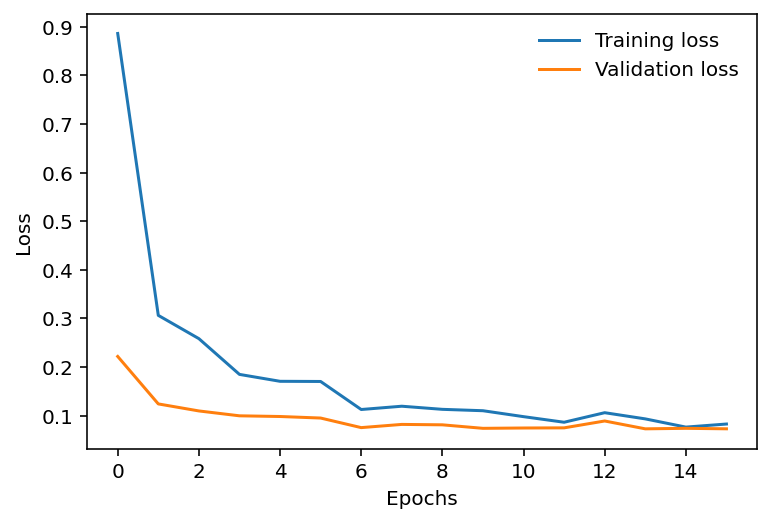

In [257]:
model = torchvision.models.resnet50(pretrained=True)

## freeze the layers
for param in model.parameters():
    param.requires_grad = False

# Modify the last layer
number_features = model.fc.in_features
# features = list(resnet.classifier.children())[:-1] # Remove last layer
model.fc = nn.Linear(number_features, 6)
# features.extend([torch.nn.Linear(number_features, 6)])
# resnet.classifier = torch.nn.Sequential(*features)

model = model.to(device)

# print(model)

criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
model = train_model(model, train_loader, valid_loader, optimizer,criterion, num_epochs)
model = evaluate_model(model, test_loader)

# Save 
torch.save(model.state_dict(), 'model_resnet50.ckpt')